In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# get the data

In [5]:
# get date difference
def get_date_diff(date1, date2):
    date1 = pd.to_datetime(date1)
    date2 = pd.to_datetime(date2)
    return (date1 - date2).dt.days

In [6]:
app_train = pd.read_csv('../input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app_test = pd.read_csv('../input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

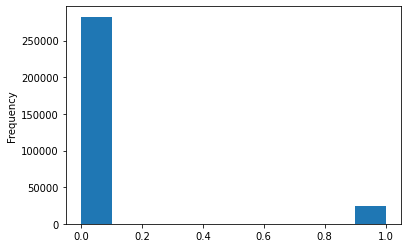

In [9]:
app_train['TARGET'].astype(int).plot.hist()

In [10]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*df.isnull().sum()/len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [11]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [12]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [14]:
le = LabelEncoder()
le_count = 0
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [15]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [16]:
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [17]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [18]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

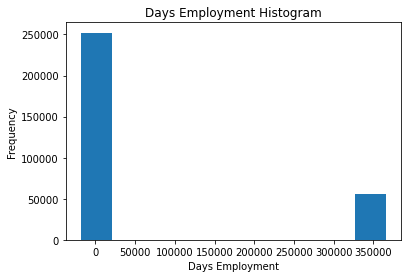

In [19]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [20]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

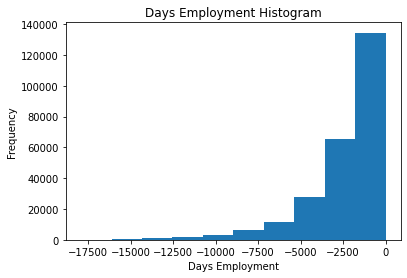

In [21]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [22]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' 
      % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [23]:
# Find correlations with the target and sort
correlations = app_train.corrwith(app_train["TARGET"]).sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
dtype: float64

Most Negative Correlation

In [24]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982692

Text(0, 0.5, 'Count')

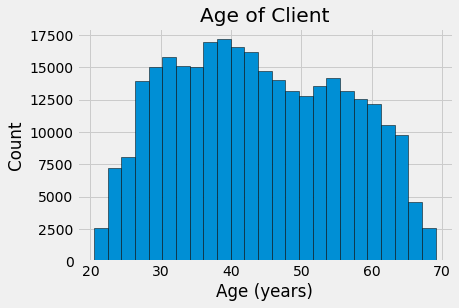

In [25]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

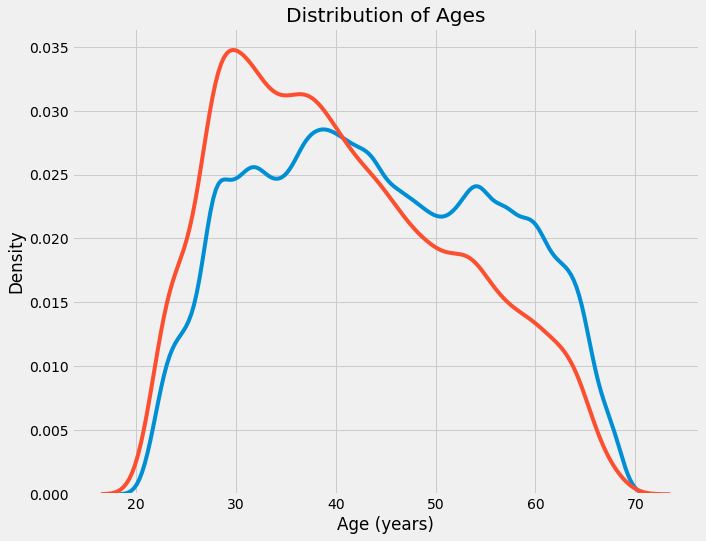

In [26]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

In [27]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [28]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

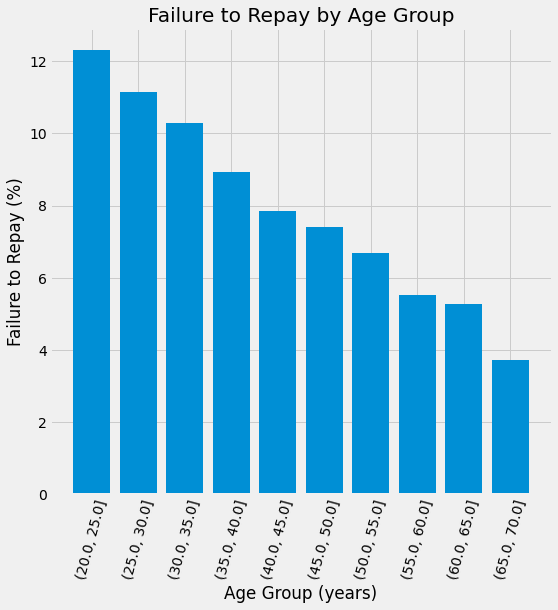

In [29]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [30]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

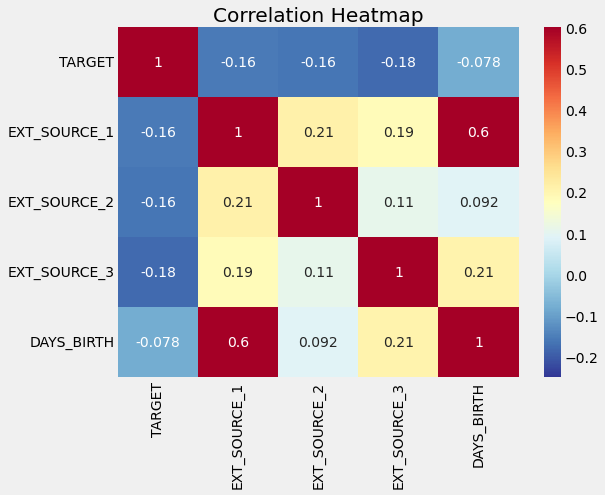

In [31]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

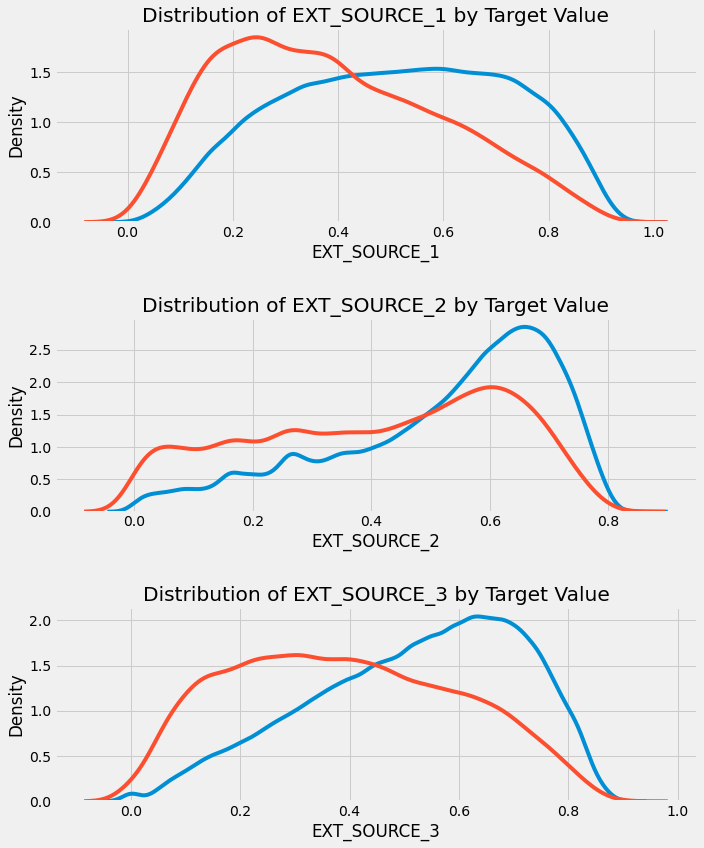

In [32]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [33]:
# Copy the data for plotting
#plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
#plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
#plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
#def corr_func(x, y, **kwargs):
   # r = np.corrcoef(x, y)[0][1]
   ## ax = plt.gca()
   # ax.annotate("r = {:.2f}".format(r),
    #            xy=(.2, .8), xycoords=ax.transAxes,
     #           size = 20)

# Create the pairgrid object
#grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
      #              hue = 'TARGET', 
      #              vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
#grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
#grid.map_diag(sns.kdeplot)

# Bottom is density plot
#grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

#plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

### below - your part

## Feature Engineering

### I. Polynomial Features

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures 

# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

            
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [35]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

##### Totally 35 features (with individual features raised to powers up to degree 3)

In [36]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print()
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64

DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


##### add these features to a copy of the training & testing data
##### evaluate models with and without features 

In [37]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### II. Domain Knowledge Features

1. CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
2. ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
3. DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [38]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
# app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
# app_train_domain['INCOME_CREDIT_PERCENT'] = app_train_domain['AMT_INCOME_TOTAL'] / app_train_domain['AMT_CREDIT']
# app_train_domain['INCOME_PER_PERSON'] = app_train_domain['AMT_INCOME_TOTAL'] / app_train_domain['CNT_FAM_MEMBERS']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
# app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
# app_test_domain['INCOME_CREDIT_PERCENT'] = app_test_domain['AMT_INCOME_TOTAL'] / app_test_domain['AMT_CREDIT']
# app_test_domain['INCOME_PER_PERSON'] = app_test_domain['AMT_INCOME_TOTAL'] / app_test_domain['CNT_FAM_MEMBERS']

##### Visualize these domain knowledge variables by drawing KDE plot

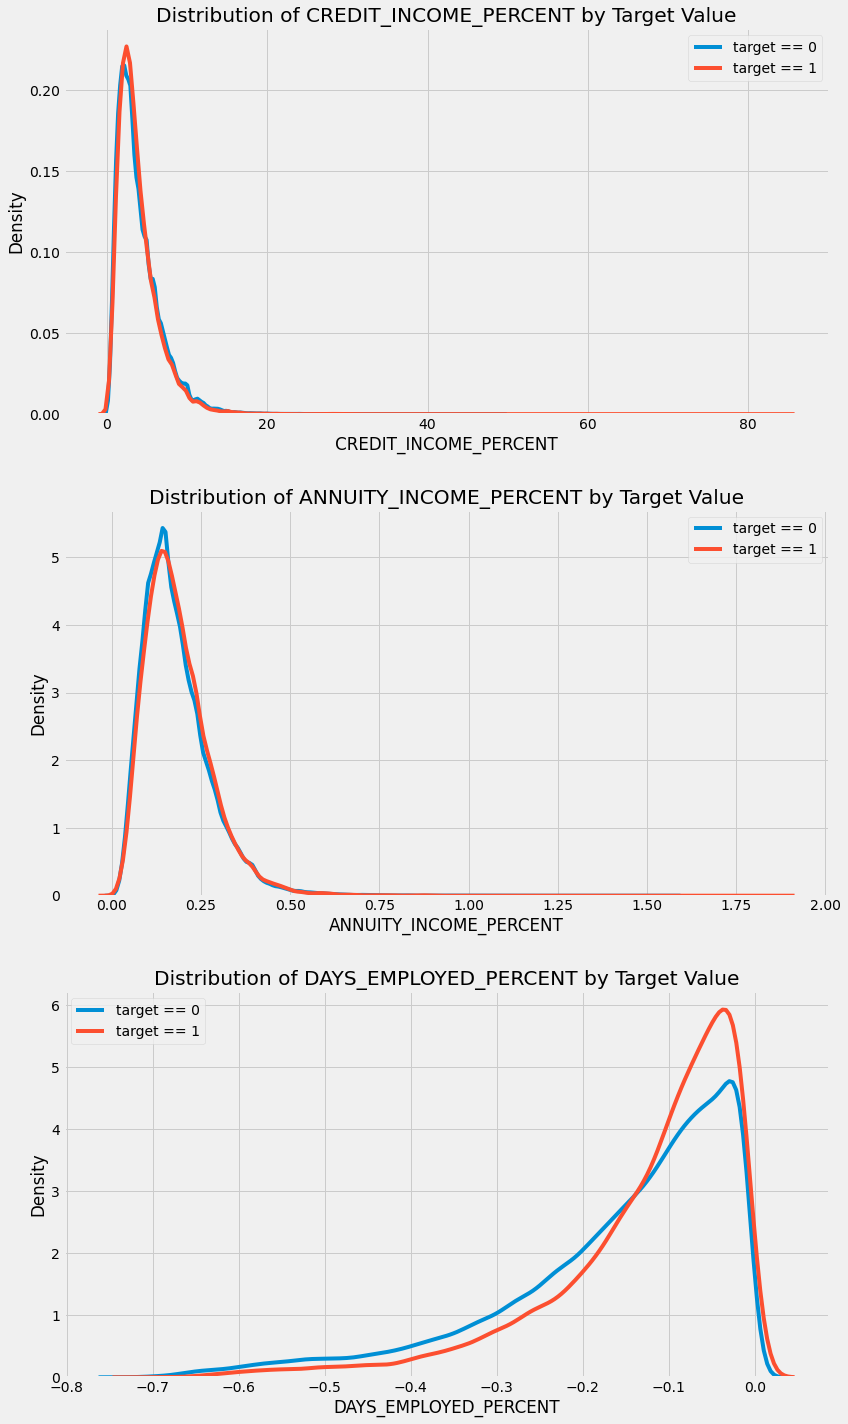

In [39]:
plt.figure(figsize = (12, 20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    plt.legend()
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### III. All Features

In [40]:
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_all = app_train_domain.merge(poly_features, on = 'SK_ID_CURR', how = 'left')


poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_all = app_test_domain.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_all, app_test_all = app_train_all.align(app_test_all, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_all.shape)
print('Testing data with polynomial features shape:  ', app_test_all.shape)

Training data with polynomial features shape:  (307511, 278)
Testing data with polynomial features shape:   (48744, 278)


# Modeling

## Preprocessing

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, RocCurveDisplay

app_train = app_train.drop(['TARGET'],axis = 1)
app_train_domain = app_train_domain.drop(['TARGET'],axis = 1)


### Train/Test with raw features

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


### Train/Test with poly features

In [43]:
# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

train_poly = imputer.fit_transform(app_train_poly)
test_poly = imputer.fit_transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

train_poly = scaler.fit_transform(train_poly)
test_poly = scaler.transform(test_poly)

print('Training data shape: ', train_poly.shape)
print('Testing data shape: ', test_poly.shape)

Training data shape:  (307511, 275)
Testing data shape:  (48744, 275)


### Train/Test with domain features

In [44]:
imputer = SimpleImputer(strategy = 'median')

train_domain = imputer.fit_transform(app_train_domain)
test_domain = imputer.transform(app_test_domain)

# Scale the domain features
scaler = MinMaxScaler(feature_range = (0, 1))

train_domain = scaler.fit_transform(train_domain)
test_domain = scaler.transform(test_domain)

print('Training data shape: ', train_domain.shape)
print('Testing data shape: ', test_domain.shape)

Training data shape:  (307511, 243)
Testing data shape:  (48744, 243)


### Train/Test with all features

In [45]:
imputer = SimpleImputer(strategy = 'median')

train_all = imputer.fit_transform(app_train_all)
test_all = imputer.transform(app_test_all)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

train_all = scaler.fit_transform(train_all)
test_all = scaler.transform(test_all)

print('Training data shape: ', train_all.shape)
print('Testing data shape: ', test_all.shape)

Training data shape:  (307511, 278)
Testing data shape:  (48744, 278)


### Split Train/Validate

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(train_poly, train_labels, test_size=0.2, random_state=42)

X_train_domain, X_test_domain, y_train_domain, y_test_domain = train_test_split(train_domain, train_labels, test_size=0.2, random_state=42)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(train_all, train_labels, test_size=0.2, random_state=42)

### Evaluation Function

In [47]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay

def model_eval(actual,predict):
    roc_score = roc_auc_score(actual, predict)
    print('ROC AUC score: {:.4f}'.format(roc_score))

    disp = RocCurveDisplay.from_predictions(actual, predict)
    plt.show()

### Model Predict Function

In [48]:
def model_pred(model,dataset):
  if dataset == 'Origin':
    Xtrain,Xtest,ytrain,ytest = X_train, X_test, y_train, y_test
  elif dataset == 'Poly':
    Xtrain,Xtest,ytrain,ytest = X_train_poly, X_test_poly, y_train_poly, y_test_poly
  elif dataset == 'Domain':
    Xtrain,Xtest,ytrain,ytest = X_train_domain, X_test_domain, y_train_domain, y_test_domain
  else:
    Xtrain,Xtest,ytrain,ytest = X_train_all, X_test_all, y_train_all, y_test_all
  
  model.fit(Xtrain, ytrain)
  ypred = model.predict_proba(Xtest)[:,1]
  print(dataset,':')
  model_eval(ytest,ypred)

## Logistic Regression

##### Lower the regularization parameter C to decrease overfitting

Origin :
ROC AUC score: 0.6899


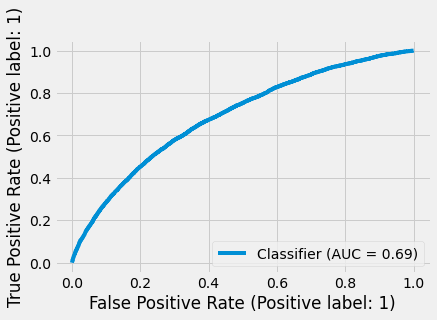

Poly :
ROC AUC score: 0.7345


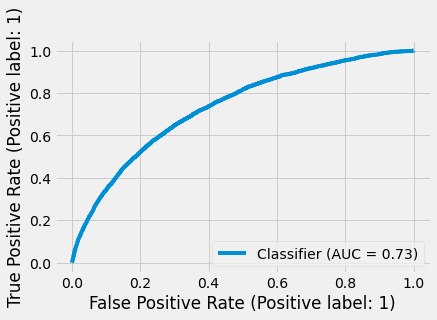

Domain :
ROC AUC score: 0.6912


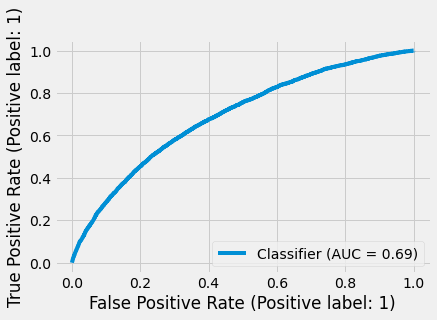

All :
ROC AUC score: 0.7350


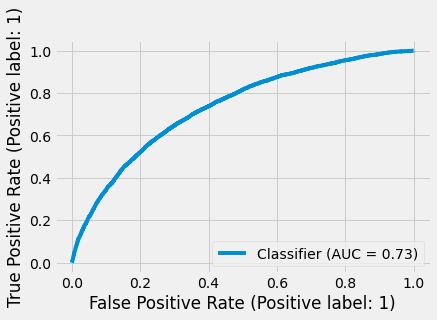

In [49]:
from sklearn.linear_model import LogisticRegression

model_logReg = LogisticRegression(random_state = 42, C = 0.0001, n_jobs=-1)

testList = ['Origin','Poly','Domain','All']
for dataset in testList:
  model_pred(model_logReg,dataset)

## Support Vector Machine

##### Use SVP to fit model and make prediction

In [50]:
# from sklearn import svm

# model_SVM = svm.SVC(verbose = True, probability = True)

# testList = ['Origin'] # ['Origin','Poly','Domain','All']
# for dataset in testList:
#   model_pred(model_SVM, dataset)

## Random Forest

### Model Interpretation: Feature Importances

As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. Given the correlations we saw in the exploratory data analysis, we should expect that the most important features are the `EXT_SOURCE` and the `DAYS_BIRTH`. We may use these feature importances as a method of dimensionality reduction in future work.

In [51]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [52]:
def tree_model_pred(model,dataset):
  if dataset == 'Origin':
    Xtrain,Xtest,ytrain,ytest = X_train, X_test, y_train, y_test
    apptrain = app_train
  elif dataset == 'Poly':
    Xtrain,Xtest,ytrain,ytest = X_train_poly, X_test_poly, y_train_poly, y_test_poly
    apptrain = app_train_poly
  elif dataset == 'Domain':
    Xtrain,Xtest,ytrain,ytest = X_train_domain, X_test_domain, y_train_domain, y_test_domain
    apptrain = app_train_domain
  else:
    Xtrain,Xtest,ytrain,ytest = X_train_all, X_test_all, y_train_all, y_test_all
    apptrain = app_train_all

  
  model.fit(Xtrain, ytrain)

  ypred = model.predict_proba(Xtest)[:,1]
  print(dataset,':')
  model_eval(ytest,ypred)
  
  feature_importance_values = model.feature_importances_
  feature_importances = pd.DataFrame({'feature': list(apptrain.columns), 'importance': feature_importance_values})
  feature_importances_sorted = plot_feature_importances(feature_importances)

##### Use RF to fit model and make prediction

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


Origin :
ROC AUC score: 0.7081


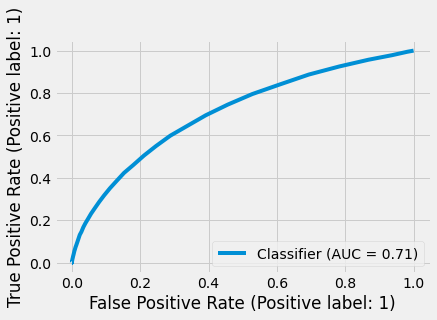

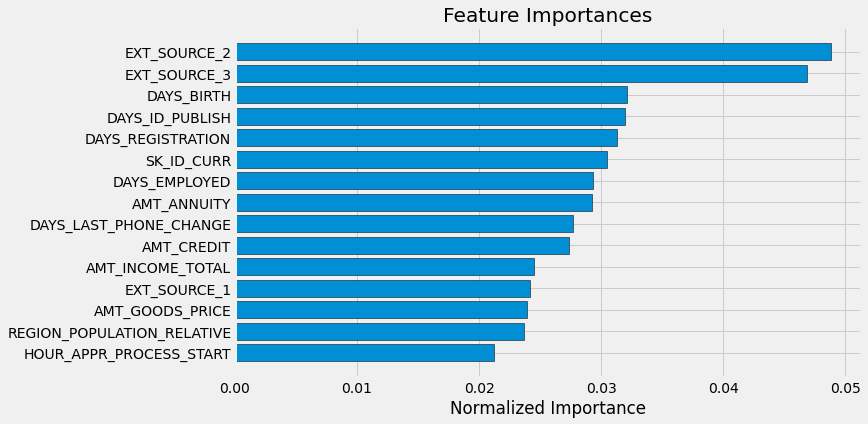

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s


Poly :
ROC AUC score: 0.7111


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


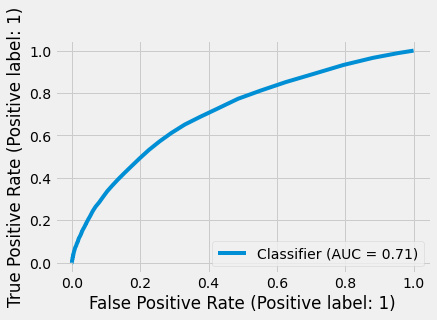

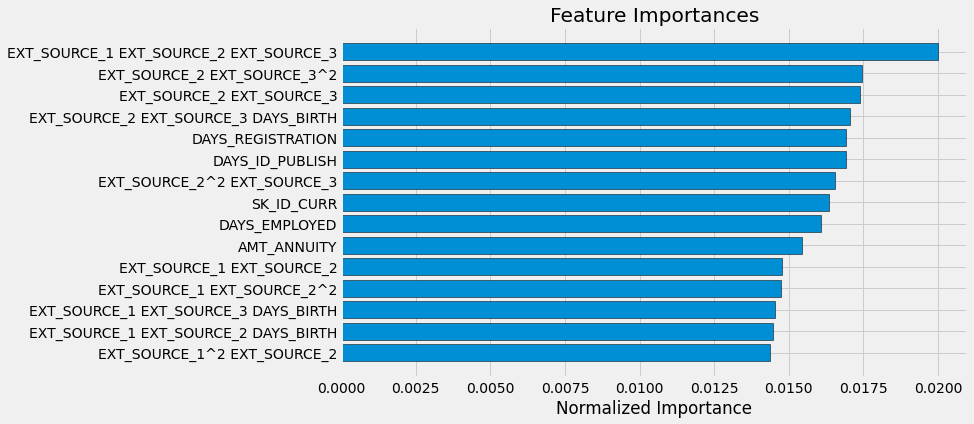

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s


Domain :
ROC AUC score: 0.7081


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


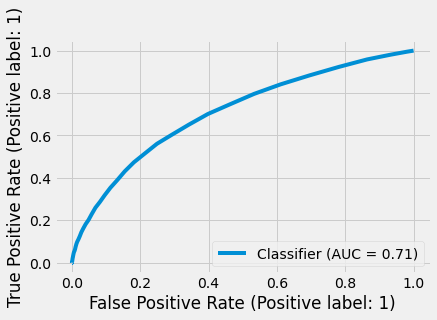

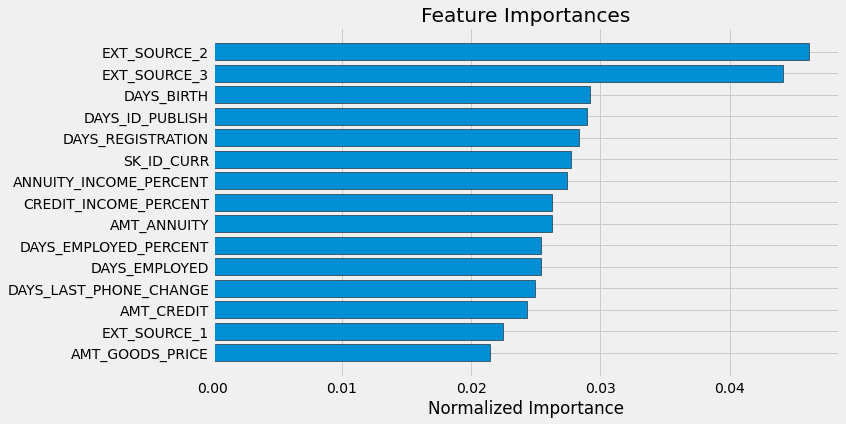

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


All :
ROC AUC score: 0.7110


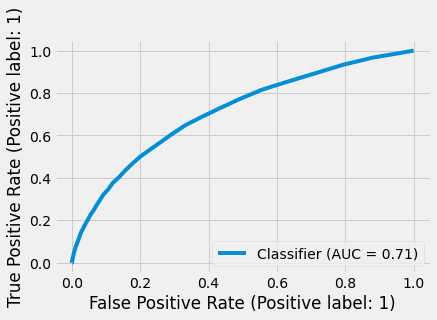

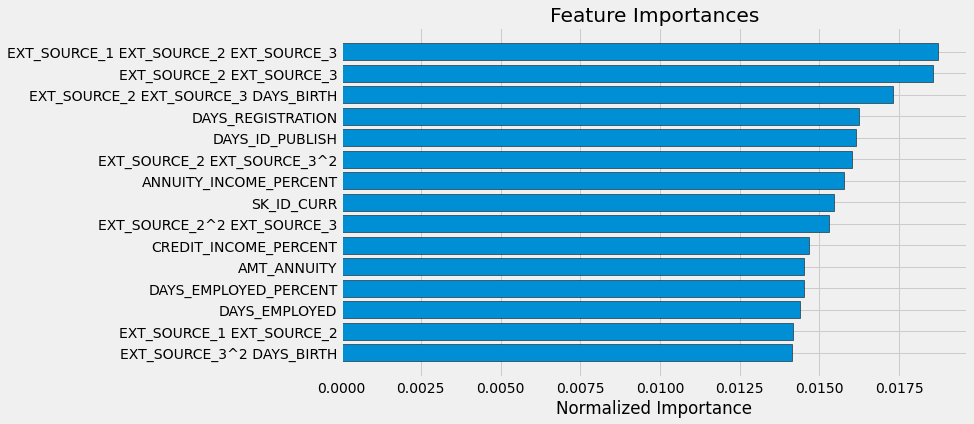

In [53]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

testList = ['Origin','Poly','Domain','All']
for dataset in testList:
  tree_model_pred(model_RF,dataset)

## GBDT

Origin :
ROC AUC score: 0.7466


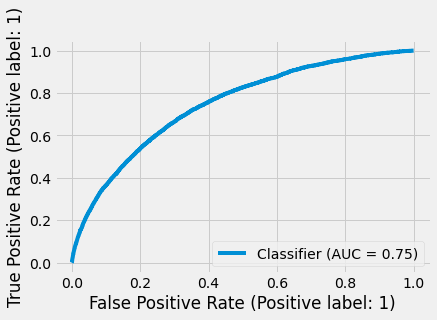

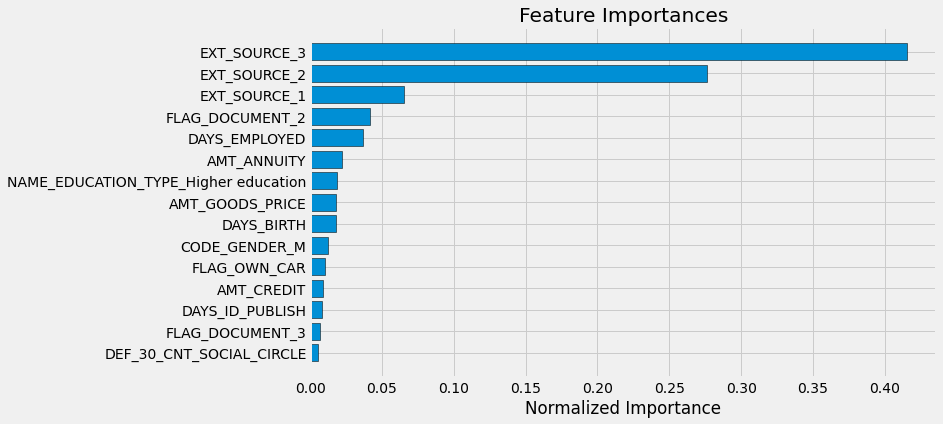

Poly :
ROC AUC score: 0.7482


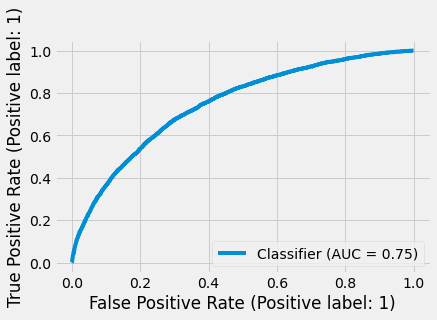

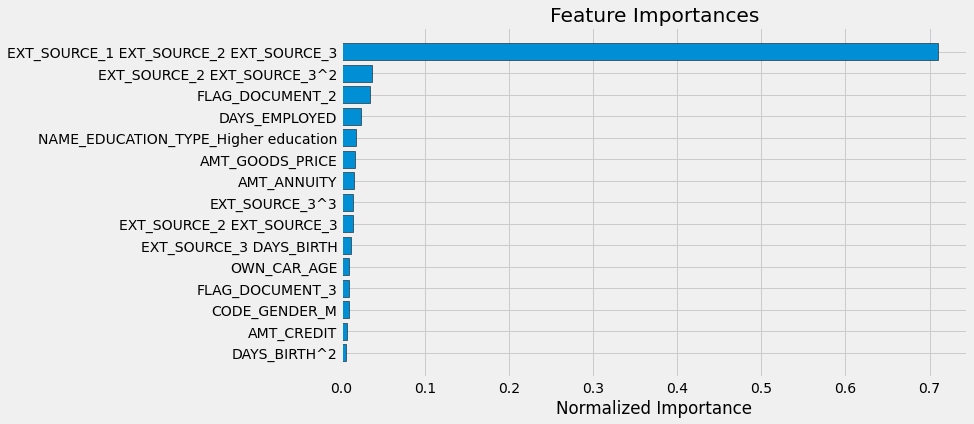

Domain :
ROC AUC score: 0.7463


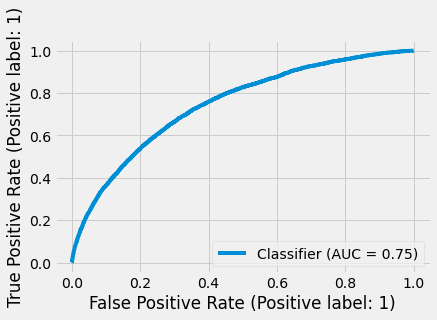

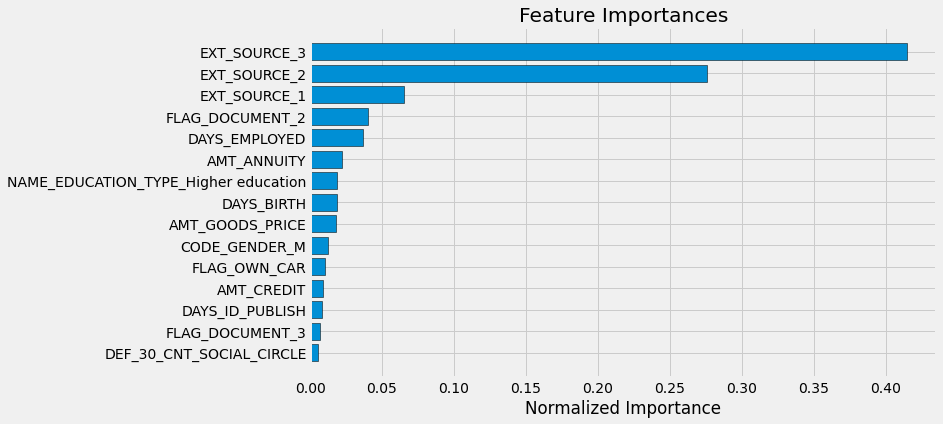

All :
ROC AUC score: 0.7481


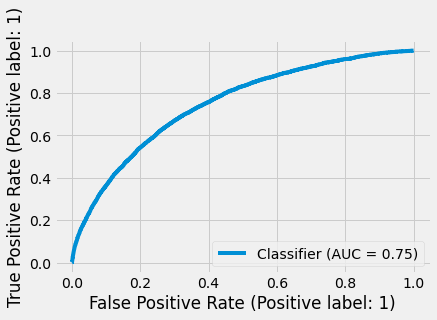

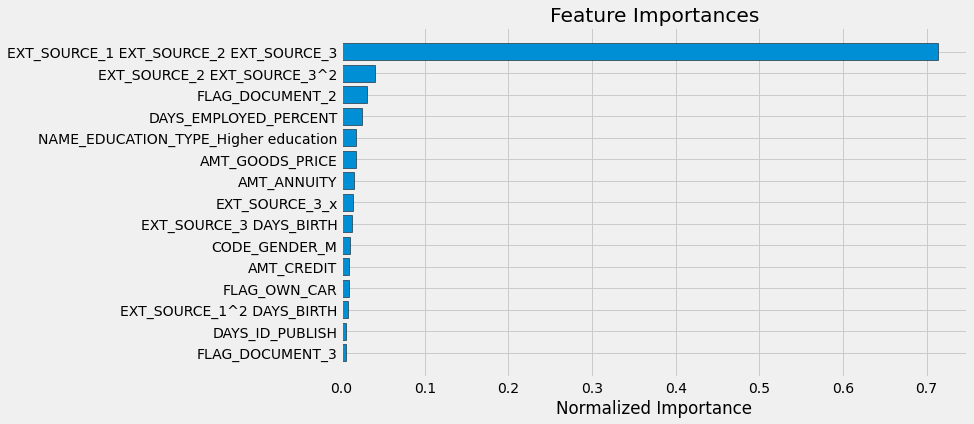

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

testList = ['Origin','Poly','Domain','All'] # ['Origin','Poly','Domain','All']
for dataset in testList:
  tree_model_pred(model_GBDT,dataset)

## xgBoost

Origin :
ROC AUC score: 0.7261


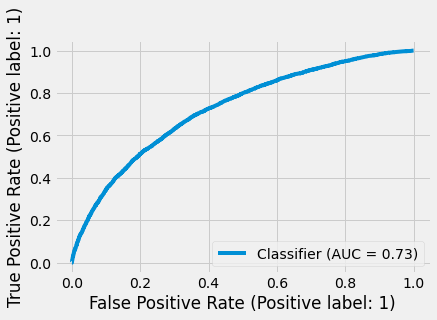

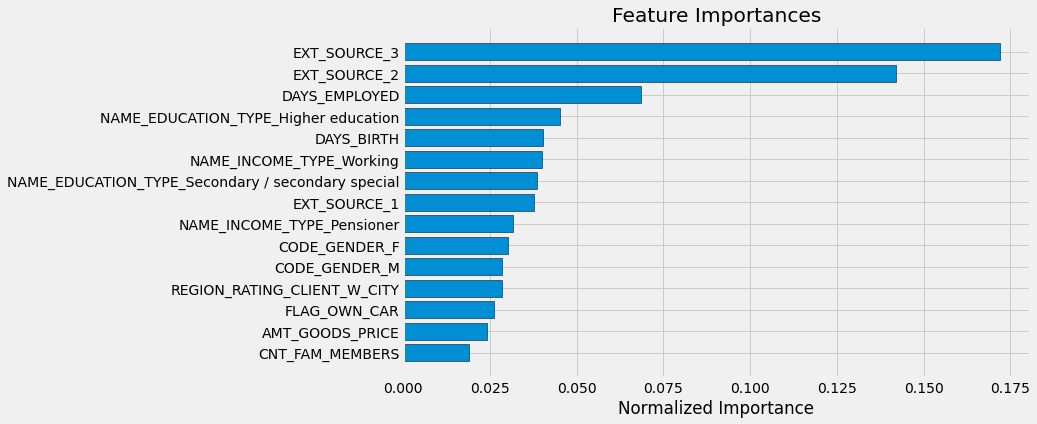

Poly :
ROC AUC score: 0.7310


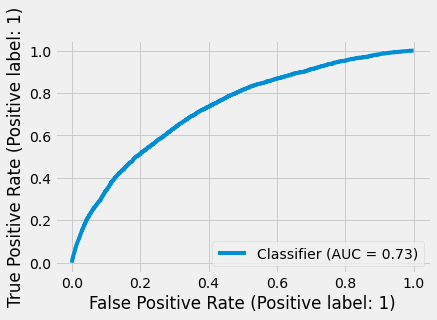

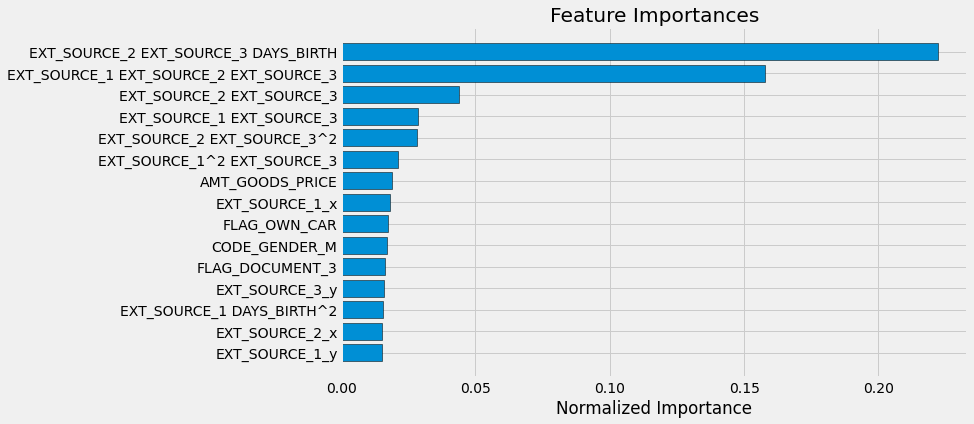

Domain :
ROC AUC score: 0.7262


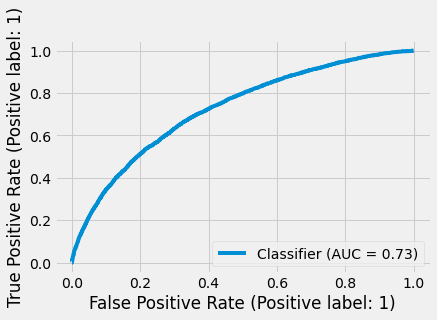

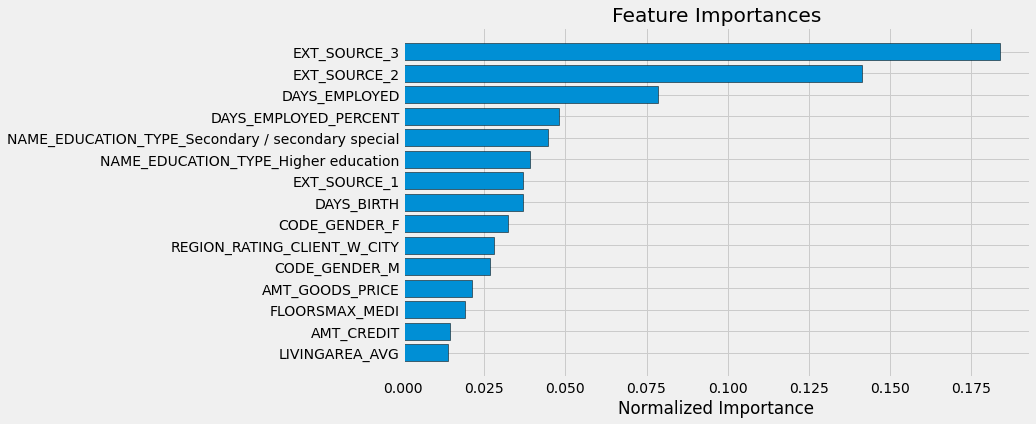

All :
ROC AUC score: 0.7308


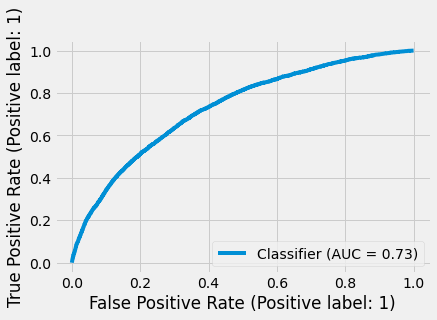

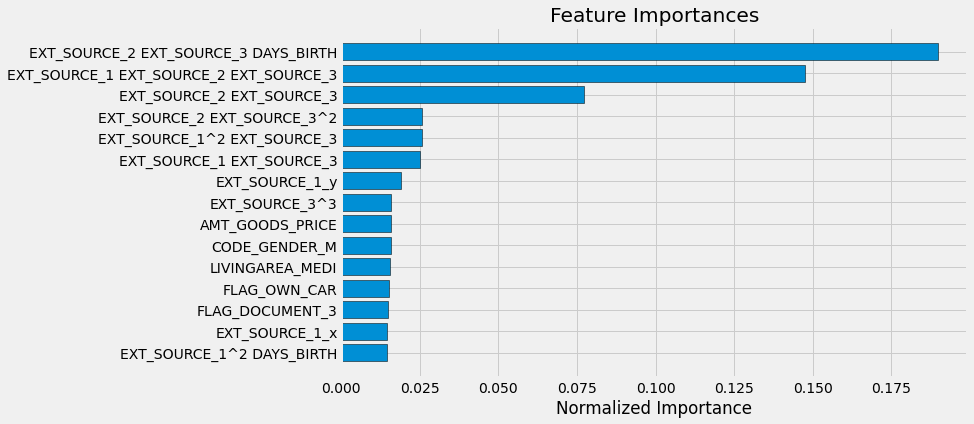

In [55]:
import xgboost as xgb

model_xgBoost = xgb.XGBClassifier(learning_rate =0.01, 
              n_estimators=100,
              max_depth=4, 
              min_child_weight=5, 
              subsample=0.8, 
              colsample_bytree=0.8, 
              objective= 'binary:logistic', 
              nthread=4, 
              scale_pos_weight=2.5, 
              seed=27, 
              reg_lambda = 1.2)

testList = ['Origin','Poly','Domain','All'] # ['Origin','Poly','Domain','All']
for dataset in testList:
  tree_model_pred(model_xgBoost,dataset)

### lightGBM

Origin :
ROC AUC score: 0.7436


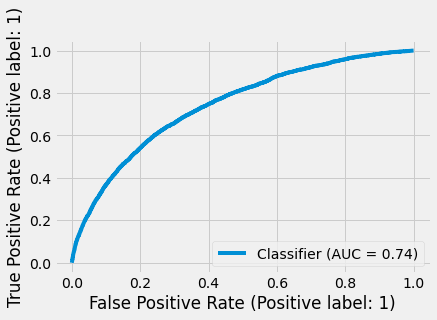

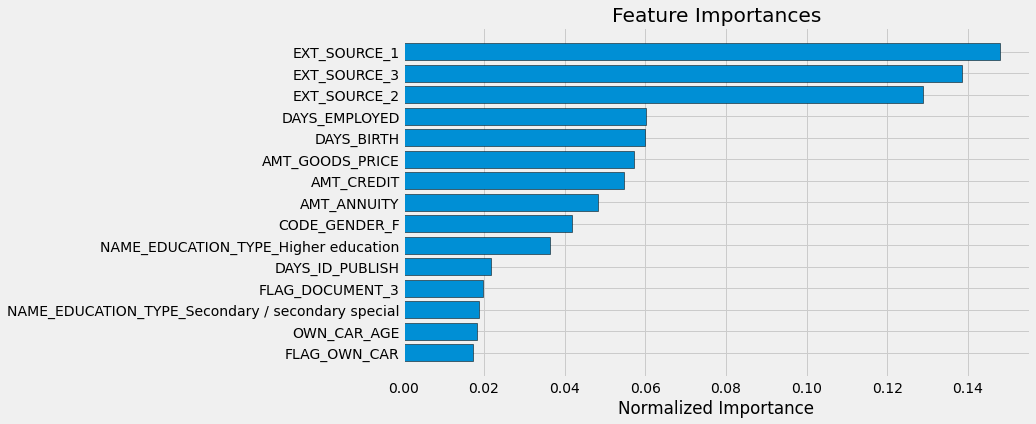

Poly :
ROC AUC score: 0.7453


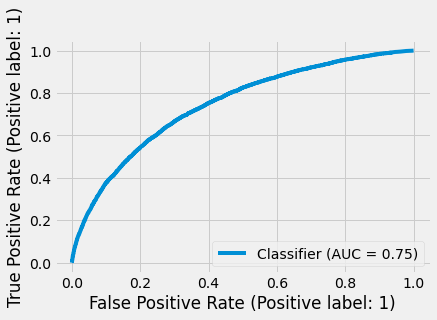

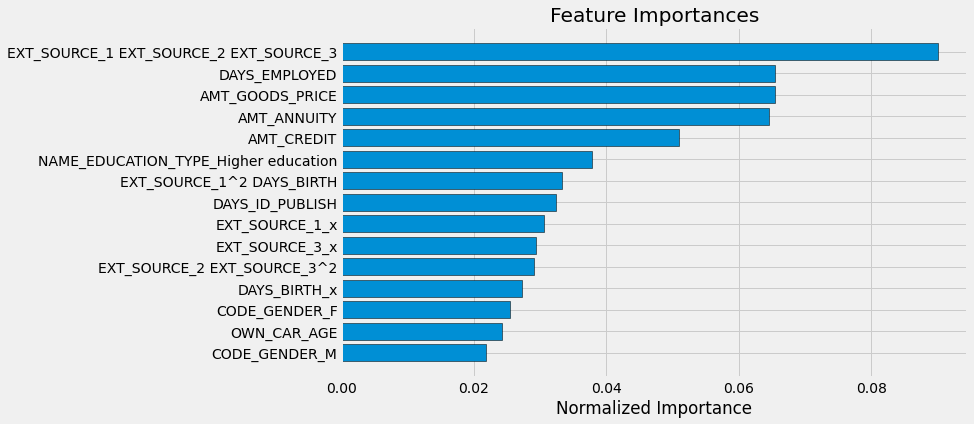

Domain :
ROC AUC score: 0.7437


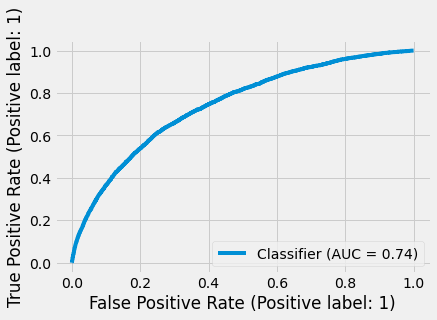

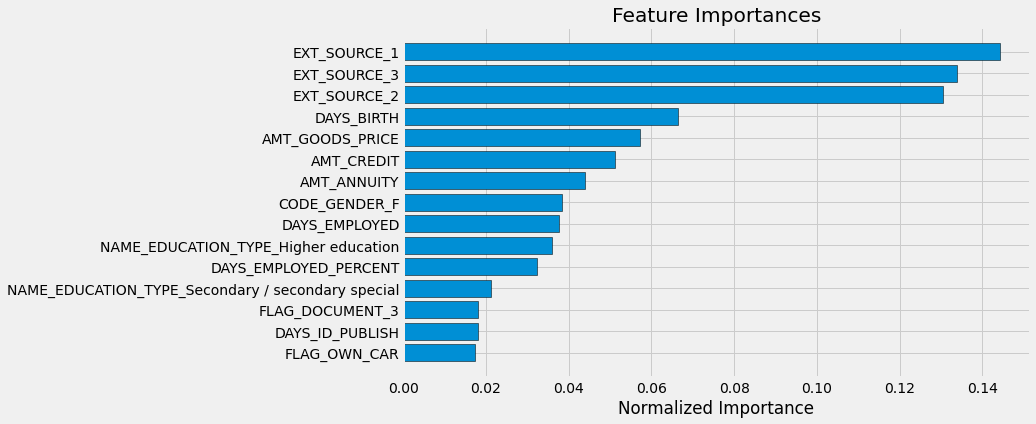

All :
ROC AUC score: 0.7455


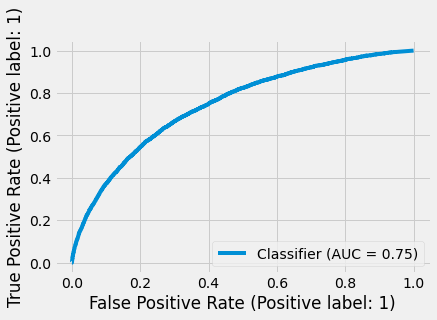

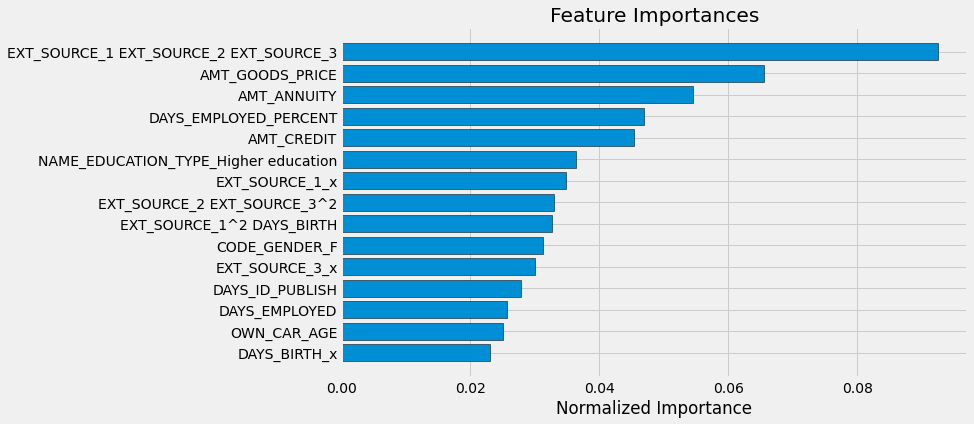

In [56]:
import lightgbm as lgb

model_lightGBM = lgb.LGBMClassifier(nthread=4,
            n_estimators=100,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1)

testList = ['Origin','Poly','Domain','All'] # ['Origin','Poly','Domain','All']
for dataset in testList:
  tree_model_pred(model_lightGBM,dataset)

## Deep Learning

In [57]:
# Define Neural Network Model
import torch
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print("GPU NAME --> ", torch.cuda.get_device_name(0))

# SET HYPERPARAMETERS
hp_test_size = 0.2
hp_epochs = 30
hr_batch_size = 320
hp_lr= 0.000008
hp_emb_drop = 0.04
hp_layers = [800, 350]
hp_ps = [0.001,0.01]


GPU NAME -->  Tesla T4


In [58]:
# CREATE TENSORS
print("CREATING TENSORS...")
def create_tensors(input_df):
  stack = []
  if isinstance(input_df, np.ndarray):
    return torch.tensor(input_df, dtype=torch.float)
  
  for column in input_df.columns:
    if input_df.dtypes[column] == np.int64 or input_df.dtypes[column] == np.float64:
      stack.append(input_df[column].astype(np.float64))
    else:
      stack.append(input_df[column].cat.codes.values)
  return torch.tensor(np.stack(stack, 1), dtype=torch.float)

tensor_x_train = create_tensors(X_train).float().to(device)
tensor_y_train = torch.tensor(y_train.values).flatten().float().to(device)
tensor_x_test = create_tensors(X_test).float().to(device)
tensor_y_test = torch.tensor(y_test.values).flatten().float().to(device)


# tensor_x_train_cat = create_tensors(x_train[categorical_columns]).float().to(device)
# tensor_x_train_num = create_tensors(x_train[numerical_columns]).float().to(device)
# tensor_y_train = torch.tensor(y_train.values).flatten().float().to(device)

# tensor_x_valid_cat = create_tensors(x_validation[categorical_columns]).float().to(device)
# tensor_x_valid_num = create_tensors(x_validation[numerical_columns]).float().to(device)
# tensor_y_valid = torch.tensor(y_validation.values).flatten().float().to(device)

# tensor_x_test_cat = create_tensors(test_df[categorical_columns]).float().to(device)
# tensor_x_test_num = create_tensors(test_df[numerical_columns]).float().to(device)

# # CREATE CATEGORICAL EMBEDDING SIZES
# categorical_columns_size = [len(df[column].cat.categories) for column in categorical_columns]
# categorical_embedding_sizes = [(col_size, min(50, (col_size + 1) // 2)) for col_size in categorical_columns_size]


CREATING TENSORS...


In [60]:
class Model(nn.Module):
    def __init__(self, input_size, layers, ps):
        super().__init__()
        layerlist = []
        for i, elem in enumerate(layers):
            layerlist.append(nn.Linear(input_size, elem))
            layerlist.append(nn.ReLU())
            layerlist.append(nn.BatchNorm1d(elem))
            layerlist.append(nn.Dropout(ps[i]))
            input_size = elem
        layerlist.append(nn.Linear(layers[-1], 1))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x):
        x = self.layers(x)
        return x

input_size = tensor_x_train.shape[1]
model = Model(input_size, hp_layers, hp_ps).to(device)
sigmoid = nn.Sigmoid()
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=hp_lr)
model.train()

Model(
  (layers): Sequential(
    (0): Linear(in_features=240, out_features=800, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=800, out_features=350, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=350, out_features=1, bias=True)
  )
)

In [61]:
# Train Neural Network Model
print("Training Model...")
train_tensor_dataset = TensorDataset(tensor_x_train, tensor_y_train)
train_loader = DataLoader(train_tensor_dataset, batch_size=hr_batch_size, shuffle=True)
# train_tensor_dataset = TensorDataset(tensor_x_train_cat, tensor_x_train_num, tensor_y_train)
# train_loader = DataLoader(dataset=train_tensor_dataset, batch_size=hr_batch_size, shuffle=True)
test_tensor_dataset = TensorDataset(tensor_x_test, tensor_y_test)
test_loader = DataLoader(test_tensor_dataset, batch_size=hr_batch_size, shuffle=False)


Training Model...


In [ ]:
tot_y_train_in = []
tot_y_train_out = []
tot_y_test_in = []
tot_y_test_out = []

for epoch in range(hp_epochs):
    train_losses = []
    for x, y in train_loader:
        y_train = model(x)
        single_loss = loss_function(sigmoid(y_train.squeeze()), y)
        single_loss.backward()
        optimizer.step()
        train_losses.append(single_loss.item())
        tot_y_train_in.append(y)
        tot_y_train_out.append(y_train)
    epoch_loss = 1.0 * sum(train_losses) / len(train_losses)
    epoch_auc = roc_auc_score(torch.cat(tot_y_train_in).cpu().numpy(), \
        torch.cat(tot_y_train_out).cpu().detach().numpy())
    tot_y_train_in = []
    tot_y_train_out = []
    for x, y in test_loader:
        y_test = model(x)
        tot_y_test_in.append(y)
        tot_y_test_out.append(y_test)
    epoch_test_auc = roc_auc_score(torch.cat(tot_y_test_in).cpu().numpy(), \
        torch.cat(tot_y_test_out).cpu().detach().numpy())
    # print("\tepoch: " + str(epoch) + "\tloss: " + str(epoch_loss) + "\tauc: " + str(epoch_auc) + "\ttest_auc: " + str(epoch_test_auc))
    print(f"Epoch: {epoch:3}  loss: {epoch_loss:.4f}  auc: {epoch_auc:.4f}  test_auc: {epoch_test_auc:.4f}")
    a = 3

Epoch:   0  loss: 0.6984  auc: 0.6312  test_auc: 0.6626
Epoch:   1  loss: 0.6585  auc: 0.6877  test_auc: 0.6738


In [ ]:

# class Model(nn.Module):
#     def __init__(self, embedding_size, input_size, num_numerical_cols, layers, ps):
#         super().__init__()

#         self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
#         self.emb_drop = nn.Dropout(hp_emb_drop)
#         self.bn_cont = nn.BatchNorm1d(num_numerical_cols)

#         layerlist = []
#         for i, elem in enumerate(layers):
#             layerlist.append(nn.Linear(input_size, elem))
#             layerlist.append(nn.ReLU(inplace=True))
#             layerlist.append(nn.BatchNorm1d(layers[i]))
#             layerlist.append(nn.Dropout(ps[i]))
#             input_size = elem
#         layerlist.append(nn.Linear(layers[-1], 1))

#         self.layers = nn.Sequential(*layerlist)
    
#     def forward(self, x_c, x_n):
#         embeddings = [e(x_c[:, i].long()) for i , e in enumerate(self.all_embeddings)]
#         x = torch.cat(embeddings, 1)
#         x = self.emb_drop(x)
#         x_n = self.bn_cont(x_n)
#         x = torch.cat([x, x_n], 1)
#         x = self.layers(x)
#         return x 

# print("Instantiating Model")
# num_numerical_cols = tensor_x_train_num.shape[1]
# num_categorical_cols = sum((nf for ni, nf in categorical_embedding_sizes))
# initial_input_size = num_categorical_cols + num_numerical_cols
# model = Model(categorical_embedding_sizes, initial_input_size, num_numerical_cols, \
#     layers=hp_layers, ps=hp_ps)
# sigmoid = nn.Sigmoid()
# loss_function = nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=hp_lr)
# model.to(device)

# # Train Neural Network Model
# print("Training Model...")
# train_tensor_dataset = TensorDataset(tensor_x_train_cat, tensor_x_train_num, tensor_y_train)
# train_loader = DataLoader(dataset=train_tensor_dataset, batch_size=hr_batch_size, shuffle=True)
# model.train()

In [ ]:
# y_pred = svm_classification.predict_proba(X_test)[:, 1]

In [ ]:
# from sklearn.metrics import roc_auc_score, RocCurveDisplay
# roc_score = roc_auc_score(y_test, y_pred)
# print('ROC AUC score: {:.2f}'.format(roc_score))

# disp = RocCurveDisplay.from_predictions(y_test, y_pred)
# plt.show()